In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm

plt.style.use("../config/custom_plt.mplstyle")

In [2]:
labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_label.txt")

labels = np.argmax(labels, axis=1)

labels = pd.DataFrame(labels)
labels.reset_index(inplace=True)
labels.columns = ['index', 'label']
labels['index'] = labels['index'].astype(str)
labels.head()

,index,label
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [3]:
categories = labels['label'].unique()
colormap = cm.get_cmap('Set1', len(categories))

/tmp/ipykernel_3571202/3370728750.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Set1', len(categories))


In [4]:
category_to_colormap = dict(zip(categories, range(len(categories))))
category_to_colormap

{1: 0, 0: 1, 3: 2, 2: 3}

## Exploring node features

In [5]:
from sklearn.metrics.pairwise import *

features = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_feature.txt", dtype=int)

features = pd.DataFrame(features)
features.columns = [f'f{i}' for i in features.columns]
features.reset_index(inplace=True)
features['index'] = features['index'].astype(str)
features.head()

,index,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1990,f1991,f1992,f1993,f1994,f1995,f1996,f1997,f1998,f1999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import networkx as nx

# All network
# g = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/data/dblp/dblp_pprefp.edge",
#                      nodetype=int)

# For GCC
g = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_pprefp/eS1/dblp_pprefp_GC.edge")


gcc_edges_idx = list(g.nodes)

gcc_edges_idx.sort()
gcc_edges_idx[:5]

['1050', '1051', '1052', '1054', '1055']

In [7]:
len(gcc_edges_idx) # Why here is 3375 nodes and from Mercator I got 3086 (self-loops or what?)

2728

In [8]:
data = features.merge(labels, on="index")
data.index = data.index.astype(str)

# Only consider GCC !!!
data = data[data['index'].isin(gcc_edges_idx)]

data

,index,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1991,f1992,f1993,f1994,f1995,f1996,f1997,f1998,f1999,label
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,116,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
121,121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,7750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7751,7751,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7752,7752,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7753,7753,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Dimensional reduction of the nodes' features using UMAP

In [9]:
from sklearn import preprocessing
from sklearn.utils import shuffle


X = data.drop(["index", "label"], axis=1).values

le = preprocessing.LabelEncoder()
y = le.fit_transform(data['label'].values)

X[:5], y[:5]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0, 0, 0, 1, 1]))

In [10]:
np.mean(X.sum(axis=1))

42.139296187683286

In [10]:
%%time
from sklearn.model_selection import train_test_split
from umap.umap_ import UMAP
np.random.seed(12)

reducer = UMAP(metric='cosine', random_state=61)

X_umap = reducer.fit_transform(X)
X_umap.shape

CPU times: user 22.5 s, sys: 647 ms, total: 23.2 s
Wall time: 23.8 s


(2728, 2)

Text(0.5, 1.0, 'UMAP dim=2')

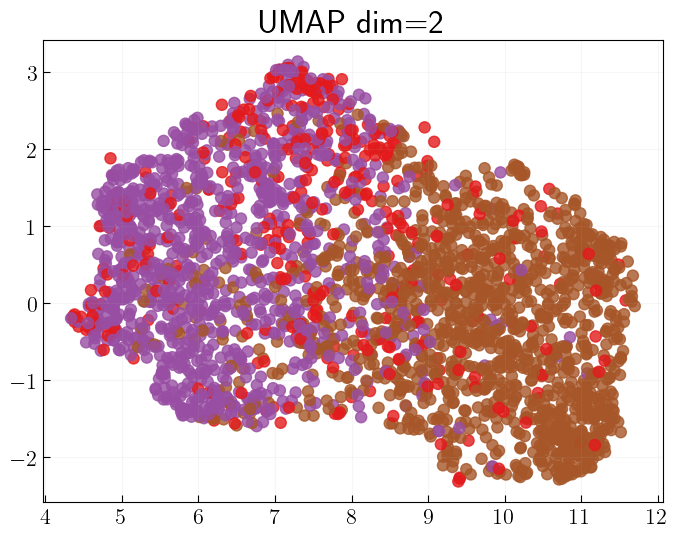

In [11]:
from matplotlib.lines import Line2D

plt.scatter(X_umap[:, 0], X_umap[:, 1], color=[colormap(i) for i in y], alpha=0.8)
plt.title('UMAP dim=2')

### Check non-euclidean embeddings

https://umap-learn.readthedocs.io/en/latest/embedding_space.html

**Spherical embeddings**

In [12]:
sphere_mapper = UMAP(metric='cosine', output_metric='haversine', random_state=61).fit(X) 

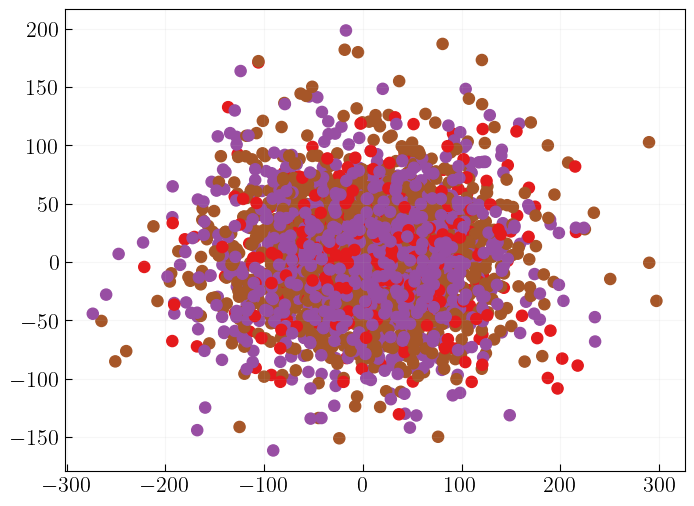

In [13]:
plt.scatter(sphere_mapper.embedding_.T[0], sphere_mapper.embedding_.T[1], c=[colormap(i) for i in y])

In [14]:
xx = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
yy = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
zz = np.cos(sphere_mapper.embedding_[:, 0])

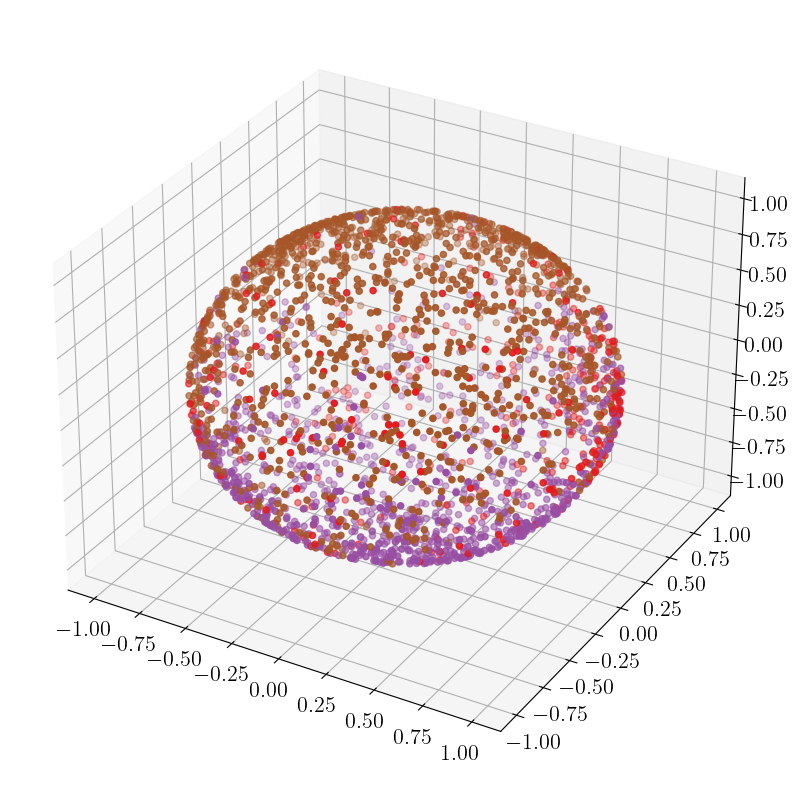

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, zz, c=[colormap(i) for i in y])

In [16]:
vectors = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1, 1)), axis=1)

In [17]:
idx = data['index'].values
idx
# np.c_[idx, vectors]

array(['2', '3', '62', ..., '7752', '7753', '7754'], dtype=object)

In [18]:
vectors[:10]

array([[ 0.67212105,  0.73704475,  0.07083938],
       [ 0.27191275,  0.9453401 , -0.17998753],
       [ 0.6115832 ,  0.7897058 ,  0.04827777],
       [ 0.14925891, -0.4342998 , -0.8883161 ],
       [-0.6908199 , -0.722915  , -0.01271859],
       [ 0.7180681 , -0.5706949 , -0.3983535 ],
       [ 0.5552336 ,  0.40043363, -0.7289503 ],
       [-0.74893475,  0.6199076 ,  0.23411827],
       [ 0.40700516,  0.6034692 ,  0.6856907 ],
       [-0.49596798,  0.45629376,  0.73879075]], dtype=float32)

In [19]:
# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/data/dblp/umap/only_gcc/umap_dblp_spherical_positions_only_gcc.txt", 'w') as f:
#     for i, v in zip(idx, vectors):
#         f.write(f'{i} {" ".join(map(str, v))}\n')

In [20]:
# F-Mercator

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/umap_dblp_spherical_positions_gcc.txt", 'w') as f:
#     for i, v in zip(idx, vectors):
#         f.write(f'{i} {" ".join(map(str, v))}\n')

In [27]:
%%time

sphere_mapper = UMAP(metric='cosine', output_metric='haversine', random_state=2).fit(X)
xx = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
yy = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
zz = np.cos(sphere_mapper.embedding_[:, 0])
vectors2 = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1, 1)), axis=1)

CPU times: user 38 s, sys: 367 ms, total: 38.3 s
Wall time: 40.5 s


100%|██████████| 2728/2728 [07:09<00:00,  6.35it/s]


The best Z-axis rotation angle:  0.0


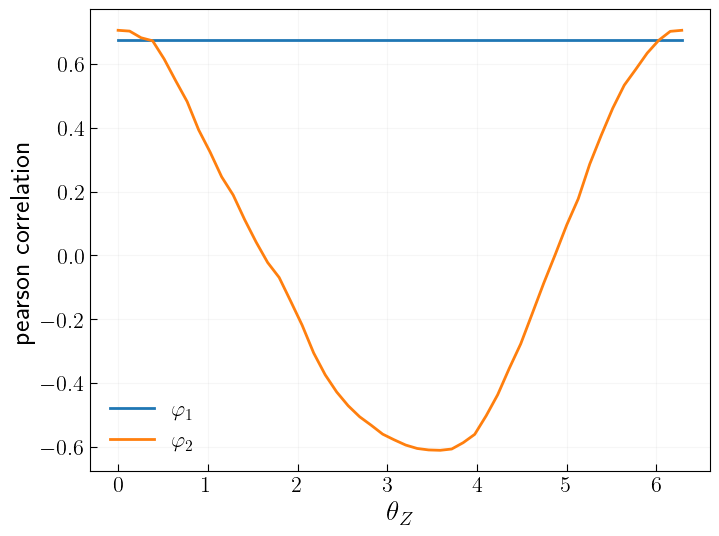

In [28]:
from lib.check_inferred_embeddings import *

real_coords_all, inf_coords_all, real_coords_spherical, inf_coords_spherical = \
    apply_pipeline_matrix_with_loading_and_rotate_all_euclidean_use_all_nodes(vectors, vectors2)

In [ ]:
plot_euclidean_coordinates_comparison(inf_coords_all, real_coords_all)